In [74]:
import math
import random
import matplotlib.pyplot as plt
from vector2d import Vector2D

In [95]:
class Particle:
    """A circular particle of unit mass with position and velocity."""

    def __init__(self, x, y, vx, vy, radius=0.01):
        self.pos = Vector2D(x, y)
        self.vel = Vector2D(vx, vy)
        self.radius = radius

    def advance(self, dt):
        """Advance the particle's position according to its velocity."""

        # Use periodic boundary conditions: a Particle that moves across an
        # edge of the domain 0<=x<1, 0<=y<1 magically reappears at the opposite
        # edge.
        self.pos = (self.pos + self.vel * dt) % 1

    def distance_to(self, other):
        """Return the distance from this Particle to other Particle."""

        return Vector2D.Distance(self.pos,other.pos)

    def get_speed(self):
        """Return the speed of the Particle from its velocity."""
        return math.sqrt(self.vel.x**2+self.vel.y**2)


In [102]:
class Simulation:
    """A simple simulation of circular particles in motion."""

    def __init__(self, nparticles, radius, v0):
        self.nparticles = nparticles
        self.radius = radius
        # Randomly initialize the particles' positions and velocity directions.
        self.particles = [self.init_particle(v0) for i in range(nparticles)]
        self.t = 0

    def init_particle(self, v0):
        """Return a new Particle object with random position and velocity.
        The position is chosen uniformly from 0 <= x < 1, 0 <= y < 1;
        The velocity has fixed magnitude, v0, but random direction.
        """

        x, y = random.random(), random.random()
        theta = 2*math.pi * random.random()
        self.v0 = v0
        vx, vy = self.v0 * math.cos(theta), self.v0 * math.sin(theta)
        return Particle(x, y, vx, vy, self.radius)

    def advance(self, dt):
        """Advance the Simulation by dt in time, handling collisions."""

        self.t += dt
        for particle in self.particles:
            particle.advance(dt)

        # Find all distinct pairs of Particles currently undergoing a collision.
        colliding_pair = []
        for i in range(self.nparticles):
            pi = self.particles[i]
            for j in range(i+1, self.nparticles):
                pj = self.particles[j]
                # pi collides with pj if their separation is less than twice
                # their radius.
                if pi.distance_to(pj) < 2 * self.radius:
                    colliding_pair.append((i, j))
        # For each pair, the velocities change according to the kinetics of
        # an elastic collision between circles.
        for i,j in colliding_pair:
            p1, p2 = self.particles[i], self.particles[j]
            r1, r2 = p1.pos, p2.pos
            v1, v2 = p1.vel, p2.vel
            dr, dv = r2 - r1, v2 - v1
            dv_dot_dr = Vector2D.DotProduct(dv,dr)
            d = Vector2D.Distance(r1,r2) ** 2
            p1.vel = v1 - dv_dot_dr / d * (r1 - r2)
            p2.vel = v2 - dv_dot_dr / d * (r2 - r1)


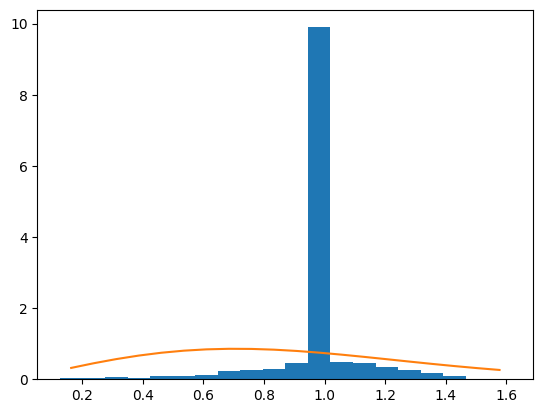

1/10


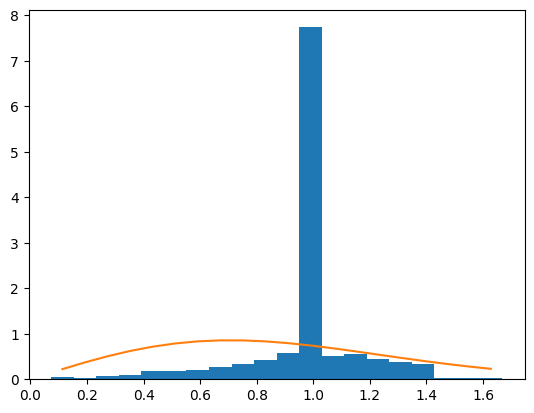

2/10


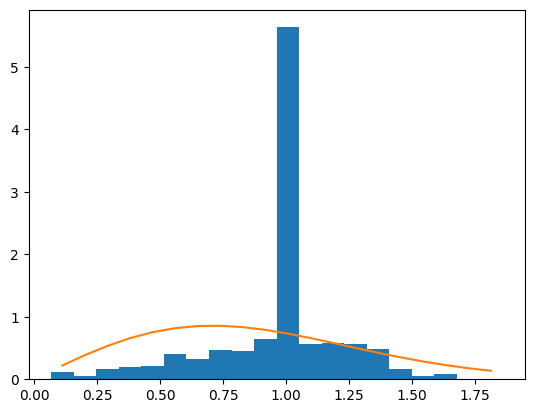

3/10


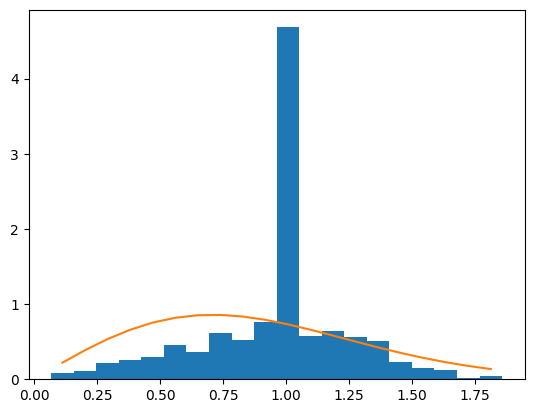

4/10


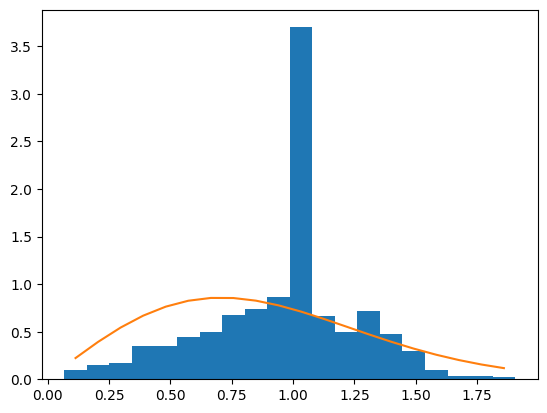

5/10


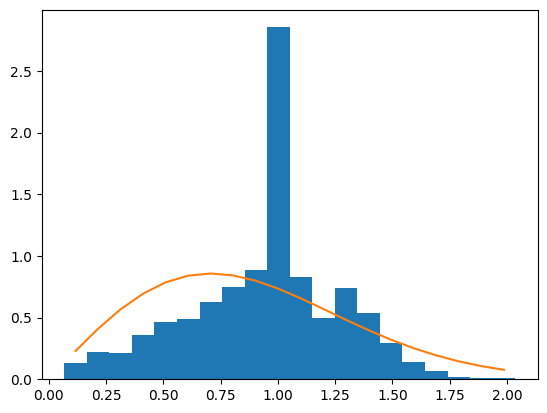

6/10


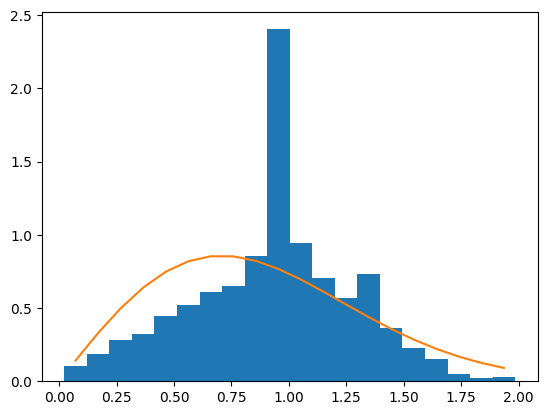

7/10


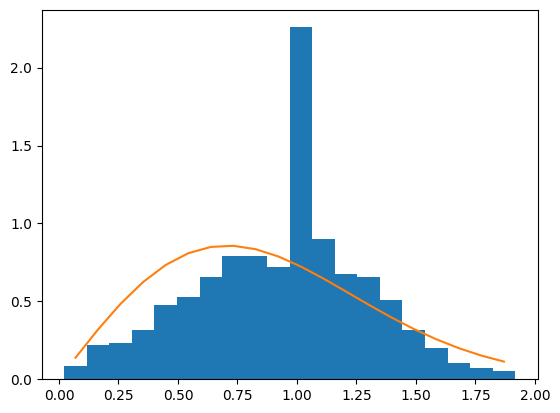

8/10


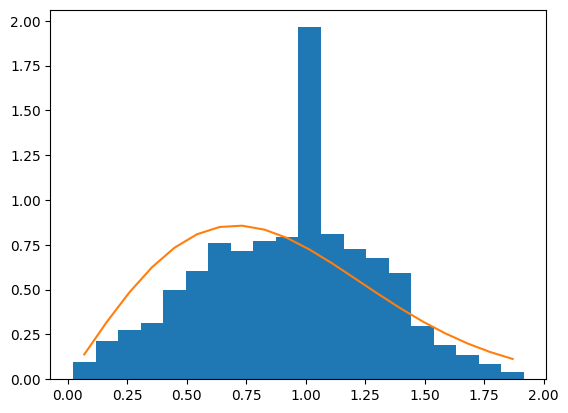

9/10


In [110]:
import numpy as np

sim = Simulation(nparticles=1000, radius=0.005, v0=1)
dt = 0.02

nit = 10
dnit = nit // 10
for i in range(nit):
    if not i % dnit and i!=0 :
        
        nbins = sim.nparticles // 50
        hist, bins, _ = plt.hist([p.get_speed() for p in sim.particles], nbins,
                      density=True)
        v = (bins[1:] + bins[:-1])/2
        KE = sim.v0**2 / 2
        # The Maxwell-Boltzmann equilibrium distribution of speeds.
        a = 1 / 2 / KE
        f = 2*a * v * np.exp(-a*v**2)
        plt.plot(v, f)
        plt.show()
        
        print(f'{i}/{nit}')
        
    sim.advance(dt)